# House Price Prediction
This notebook focuses on predicting house prices using linear regression.

## Step 1: Import Libraries
Load all necessary libraries for data processing, visualization, and modeling.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Step 2: Load Dataset
Load the housing dataset and inspect its structure.

In [ ]:
df = pd.read_csv('Housing.csv')

In [ ]:
df.head()

## Step 3: Explore Dataset
Perform exploratory data analysis to understand the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [365]:
df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
336,3920000,8080,3,1,1,yes,no,no,no,yes,2,no,semi-furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished
509,2590000,3600,2,2,2,yes,no,yes,no,no,1,no,furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
461,3080000,4960,2,1,1,yes,no,yes,no,yes,0,no,unfurnished


## Step 4: Data Cleaning
Handle outliers and clean the dataset for further analysis.

In [ ]:
px.box(df['price'])

In [ ]:
df = df[df['price'] <= 9.1e6]

In [368]:
px.box(df['area'])

In [ ]:
df = df[df['area'] <= 10.36e3]

In [370]:
df.shape

(517, 13)

In [ ]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [372]:
df['mainroad'].value_counts()

mainroad
yes    440
no      77
Name: count, dtype: int64

## Step 5: Feature Engineering
Convert categorical variables into numerical ones.

In [ ]:
def change_type(x):
    if x == 'yes':
        return 1
    elif x == 'no':
        return 0
df['mainroad'] = df['mainroad'].apply(change_type)
df['guestroom'] = df['guestroom'].apply(change_type)
df['basement'] = df['basement'].apply(change_type)
df['hotwaterheating'] = df['hotwaterheating'].apply(change_type)
df['airconditioning'] = df['airconditioning'].apply(change_type)
df['prefarea'] = df['prefarea'].apply(change_type)

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517 entries, 15 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             517 non-null    int64 
 1   area              517 non-null    int64 
 2   bedrooms          517 non-null    int64 
 3   bathrooms         517 non-null    int64 
 4   stories           517 non-null    int64 
 5   mainroad          517 non-null    int64 
 6   guestroom         517 non-null    int64 
 7   basement          517 non-null    int64 
 8   hotwaterheating   517 non-null    int64 
 9   airconditioning   517 non-null    int64 
 10  parking           517 non-null    int64 
 11  prefarea          517 non-null    int64 
 12  furnishingstatus  517 non-null    object
dtypes: int64(12), object(1)
memory usage: 56.5+ KB


In [375]:
df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    215
unfurnished       175
furnished         127
Name: count, dtype: int64

In [376]:
def change_furnishing(x):
    if x == 'furnished':
        return 1
    elif x == 'semi-furnished':
        return 2
    else:
        return 0

In [377]:
df['furnishingstatus'] = df['furnishingstatus'].apply(change_furnishing)

In [378]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,2
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,1
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,1
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


In [379]:
df['bathrooms'] = df['bathrooms'].astype('int')

## Step 6: Model Training
Train a linear regression model to predict house prices.

In [ ]:
lm = LinearRegression()

In [ ]:
x = df[['area']]
y = df[['price']]

In [ ]:
yhat = lm.predict(x)
print('The output of the first four predicted values is: ', yhat[:4])

The output of the first four predicted value is:  [[5099335.07538337]
 [5386099.21216624]
 [6294185.64531198]
 [4430218.75622336]]


## Model Evaluation
Evaluate the model using metrics such as Mean Squared Error (MSE) and R-squared.

## Step 7: Model Evaluation
Evaluate the model using metrics such as Mean Squared Error (MSE) and R-squared.

In [ ]:
mse = mean_squared_error(df['price'], yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  1816873965551.4148


In [401]:
z = df[['area', 'bedrooms', 'bathrooms', 'stories', 'airconditioning', 'parking', 'mainroad', 'guestroom']]

In [402]:
lm.fit(z, y)

LinearRegression()

In [403]:
Y_hat = lm.predict(z)

In [406]:
MSE = mean_squared_error(df['price'], Y_hat)
print('The mean square error of price and predicted value is: ', MSE)

The mean square error of price and predicted value is:  971421832924.2426


In [405]:
print('The R-square is: ', lm.score(z,y))

The R-square is:  0.6173321214124676


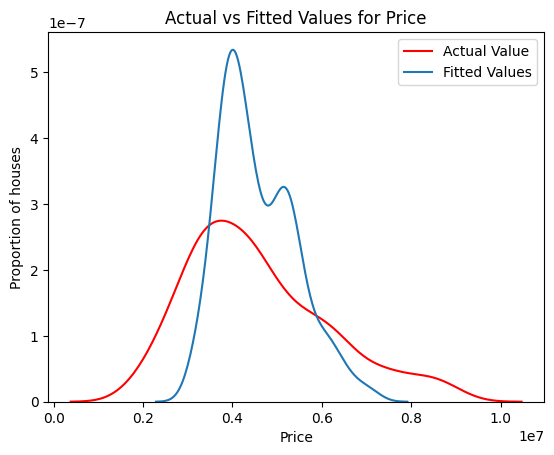

In [ ]:
ax1 = sns.kdeplot(df['price'], color="r", label="Actual Value")
sns.kdeplot(yhat,  color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of houses')
plt.legend(loc='upper right')
plt.show()
plt.close()

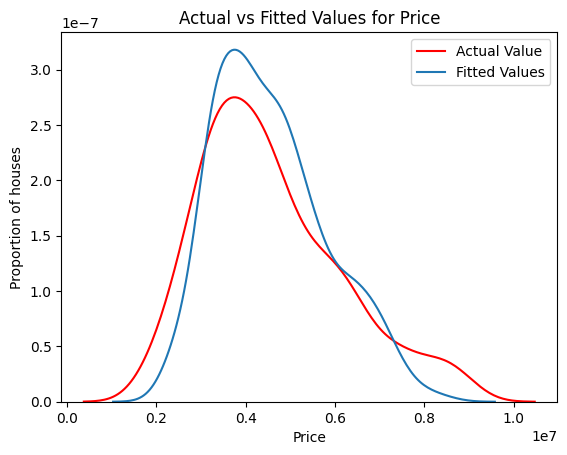

In [ ]:
ax1 = sns.kdeplot(df['price'], color="r", label="Actual Value")
sns.kdeplot(Y_hat,  color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of houses')
plt.legend(loc='upper right')
plt.show()
plt.close()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(z, y, test_size=0.2, random_state=42)

In [417]:
lm.fit(X_train, Y_train)

LinearRegression()

In [419]:
Yhat_train = lm.predict(X_train)
Yhat_train[0:5]

array([[4713915.29312341],
       [4058886.83634434],
       [4823811.00790671],
       [3096216.46671513],
       [3923876.74665747]])

In [420]:
Yhat_test = lm.predict(X_test)
Yhat_test[0:5]

array([[6274410.13011965],
       [3763196.63312963],
       [3335660.43948704],
       [3871890.9889702 ],
       [4042847.70147645]])

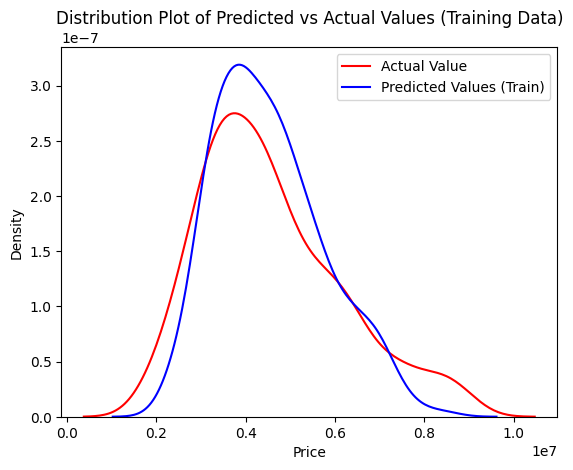

In [ ]:
title = "Distribution Plot of Predicted vs Actual Values (Training Data)"
ax1 = sns.kdeplot(df['price'], color="red", label="Actual Value")
sns.kdeplot(Yhat_train.flatten(), color="blue", label="Predicted Values (Train)", ax=ax1)
plt.title(title)
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend(loc="upper right")
plt.show()

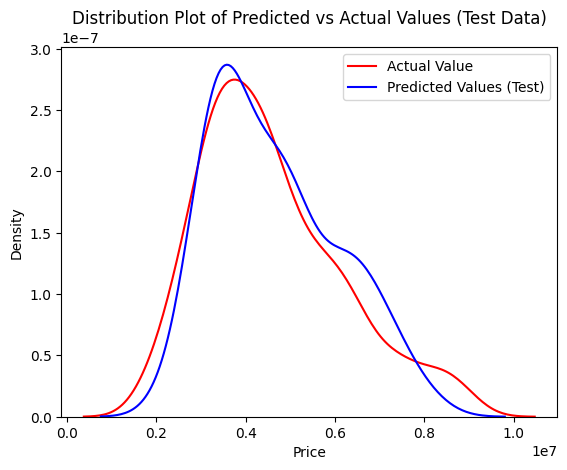

In [ ]:
title = "Distribution Plot of Predicted vs Actual Values (Test Data)"
ax1 = sns.kdeplot(df['price'], color="red", label="Actual Value")
sns.kdeplot(Yhat_test.flatten(), color="blue", label="Predicted Values (Test)", ax=ax1)
plt.title(title)
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend(loc="upper right")
plt.show()